<h1 style='color:blue'>Assignments related to Seaborn using Countries Dataset</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_json("https://restcountries.eu/rest/v2/all")

In [3]:
df.columns

Index(['name', 'topLevelDomain', 'alpha2Code', 'alpha3Code', 'callingCodes',
       'capital', 'altSpellings', 'region', 'subregion', 'population',
       'latlng', 'demonym', 'area', 'gini', 'timezones', 'borders',
       'nativeName', 'numericCode', 'currencies', 'languages', 'translations',
       'flag', 'regionalBlocs', 'cioc'],
      dtype='object')

In [129]:
df.head()

,name,topLevelDomain,alpha2Code,alpha3Code,callingCodes,capital,altSpellings,region,subregion,population,...,borders,nativeName,numericCode,currencies,languages,translations,flag,regionalBlocs,cioc,density
0,Afghanistan,[.af],AF,AFG,[93],Kabul,"[AF, Afġānistān]",Asia,Southern Asia,27657145,...,"[IRN, PAK, TKM, UZB, TJK, CHN]",افغانستان,4.0,"[{'code': 'AFN', 'name': 'Afghan afghani', 'sy...","[{'iso639_1': 'ps', 'iso639_2': 'pus', 'name':...","{'de': 'Afghanistan', 'es': 'Afganistán', 'fr'...",https://restcountries.eu/data/afg.svg,"[{'acronym': 'SAARC', 'name': 'South Asian Ass...",AFG,42.403976
1,Åland Islands,[.ax],AX,ALA,[358],Mariehamn,"[AX, Aaland, Aland, Ahvenanmaa]",Europe,Northern Europe,28875,...,[],Åland,248.0,"[{'code': 'EUR', 'name': 'Euro', 'symbol': '€'}]","[{'iso639_1': 'sv', 'iso639_2': 'swe', 'name':...","{'de': 'Åland', 'es': 'Alandia', 'fr': 'Åland'...",https://restcountries.eu/data/ala.svg,"[{'acronym': 'EU', 'name': 'European Union', '...",,18.275316
2,Albania,[.al],AL,ALB,[355],Tirana,"[AL, Shqipëri, Shqipëria, Shqipnia]",Europe,Southern Europe,2886026,...,"[MNE, GRC, MKD, KOS]",Shqipëria,8.0,"[{'code': 'ALL', 'name': 'Albanian lek', 'symb...","[{'iso639_1': 'sq', 'iso639_2': 'sqi', 'name':...","{'de': 'Albanien', 'es': 'Albania', 'fr': 'Alb...",https://restcountries.eu/data/alb.svg,"[{'acronym': 'CEFTA', 'name': 'Central Europea...",ALB,100.390497
3,Algeria,[.dz],DZ,DZA,[213],Algiers,"[DZ, Dzayer, Algérie]",Africa,Northern Africa,40400000,...,"[TUN, LBY, NER, ESH, MRT, MLI, MAR]",الجزائر,12.0,"[{'code': 'DZD', 'name': 'Algerian dinar', 'sy...","[{'iso639_1': 'ar', 'iso639_2': 'ara', 'name':...","{'de': 'Algerien', 'es': 'Argelia', 'fr': 'Alg...",https://restcountries.eu/data/dza.svg,"[{'acronym': 'AU', 'name': 'African Union', 'o...",ALG,16.962382
4,American Samoa,[.as],AS,ASM,[1684],Pago Pago,"[AS, Amerika Sāmoa, Amelika Sāmoa, Sāmoa Amelika]",Oceania,Polynesia,57100,...,[],American Samoa,16.0,"[{'code': 'USD', 'name': 'United State Dollar'...","[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':...","{'de': 'Amerikanisch-Samoa', 'es': 'Samoa Amer...",https://restcountries.eu/data/asm.svg,[],ASA,286.934673


In [33]:
# Delete rows where region is empty string 
df.drop(index=df[(df.region == '')].index, inplace=True)

In [66]:
# Create density column for density of population 
df['density'] = df['population'] / df['area']

<h2 style='color:red'>Categorical Plots</h2>

#### Display no. of countries in each region

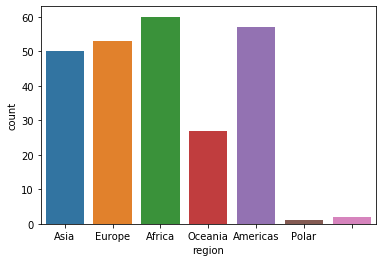

In [12]:
sns.countplot(x="region", data=df)

#### Display total population for each region

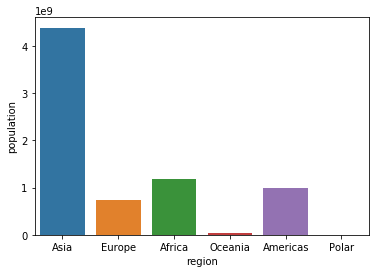

In [145]:
sns.barplot(x="region", y="population", data=df, ci=False, estimator=sum)

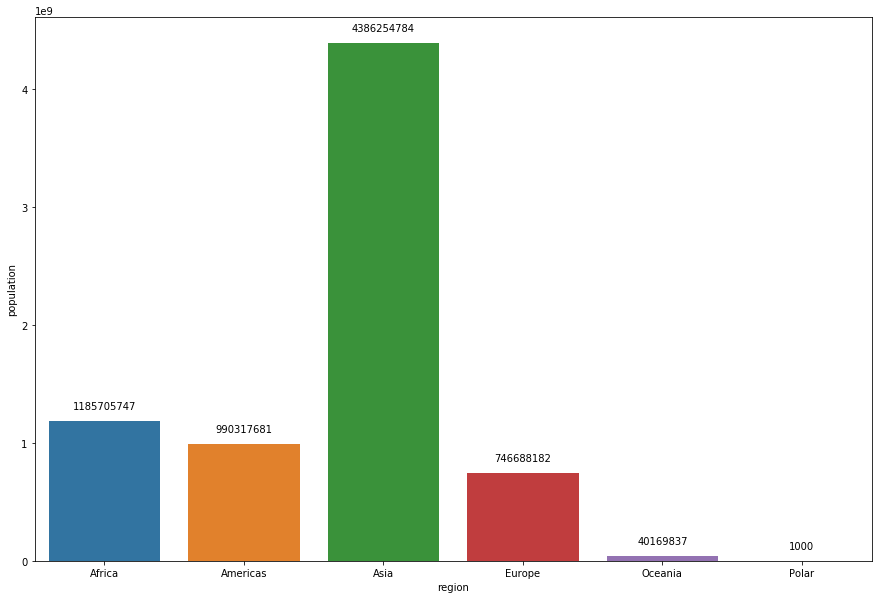

In [197]:
groups = df.groupby('region', as_index=False)['population'].sum()
g = sns.barplot(x="region", y="population", data=groups, ci=False, estimator=sum)
g.figure.set_size_inches(15,10)
for index,region in groups.iterrows():
    g.text(index,region.population + 100000000, region.population, color='black', ha="center")

#### Display population distribution in each region

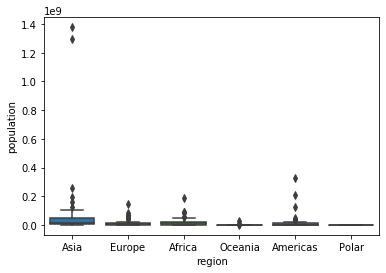

In [40]:
sns.boxplot(x='region',y = 'population', data =df)

#### Display area distribution in Asia, Europe and Africa without outliers

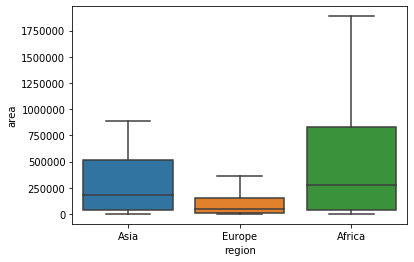

In [48]:
regions = df.loc[df.region.isin(['Asia','Europe','Africa'])]
sns.boxplot(x='region',y = 'area', data= regions, showfliers =False)

#### Display strip plot for population density for each subregion in Asia

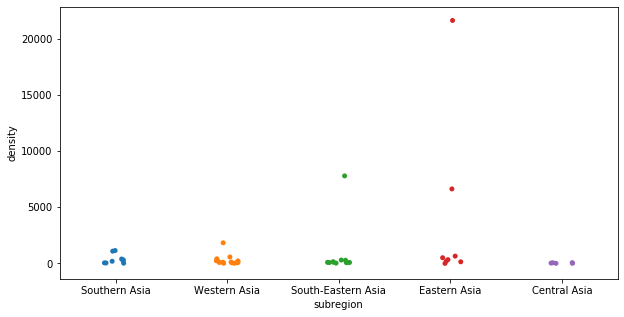

In [67]:
asia = df.loc[df.region == 'Asia']
sns.stripplot(x='subregion',y= 'density',data = asia)
plt.gcf().set_size_inches(10,5)

#### Display swarm plot for area in each region in Europe

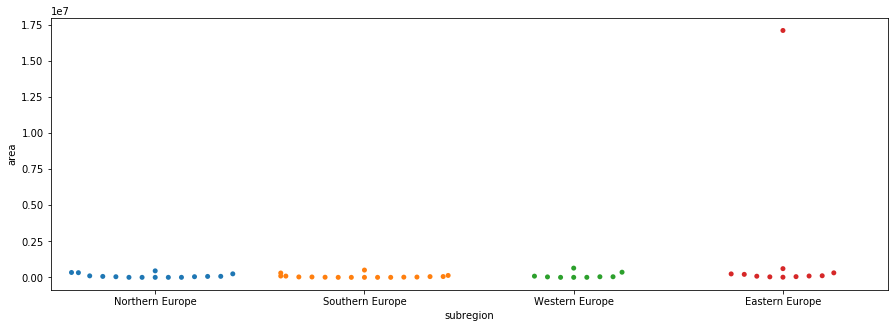

In [72]:
sns.swarmplot(x='subregion', y='area', data = df.loc[df.region=='Europe'])
plt.gcf().set_size_inches(15,5)

#### Display swarm plot for area in each region in Europe by excluding Russian Federation

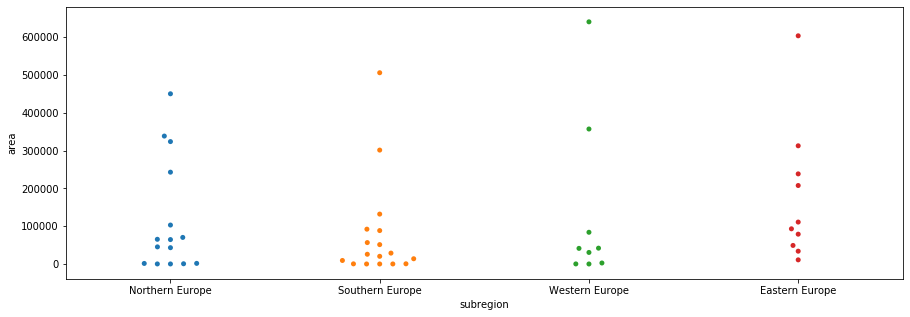

In [88]:
sns.swarmplot(x='subregion', y='area', 
         data = df.loc[(df.region=='Europe') & (df.name != 'Russian Federation')])
plt.gcf().set_size_inches(15,5)

## Distribution Plots

#### Draw histogram for population 

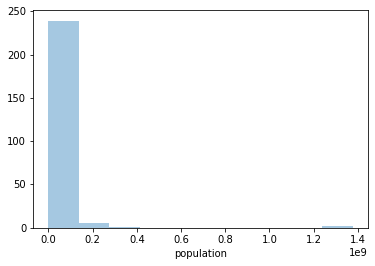

In [95]:
sns.distplot(df.population,kde=False,bins=10)

#### Draw histogram for population with custom bins - 0, 10,00,000, 1,00,00,000, 10,00,00,000, 150,00,00,000

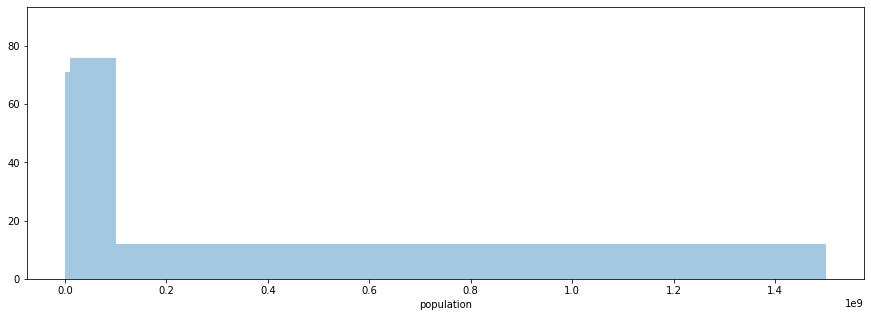

In [110]:
sns.distplot(df.population, kde=False,
             bins=[0,1000000,10000000,100000000,1500000000])
plt.gcf().set_size_inches(15,5)

#### Draw rug plot for population

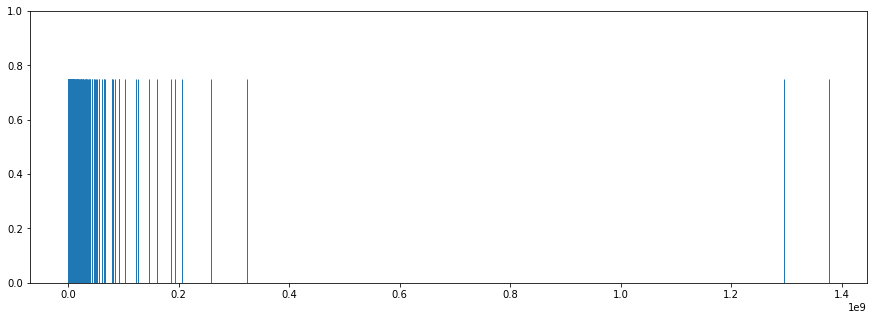

In [113]:
sns.rugplot(df.population, height=.75)
plt.gcf().set_size_inches(15,5)

## Relational Plots

#### Draw scatter plot for area and population in Africa

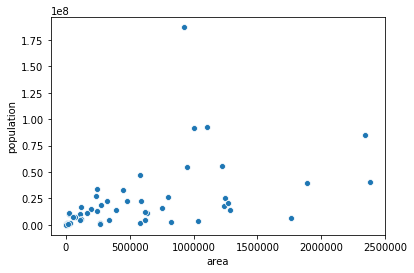

In [117]:
sns.scatterplot(x='area',y='population', data=df.loc[ df.region=='Africa'])

#### Draw scatter plot for area and population in Americas and differentiate sub regions 

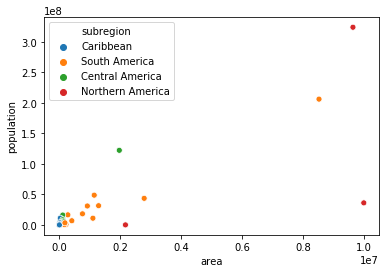

In [124]:
sns.scatterplot(x='area',y='population', data=df.loc[ df.region=='Americas'], hue='subregion')

#### Draw multiple scatter plots showing relationship between area and density in each region

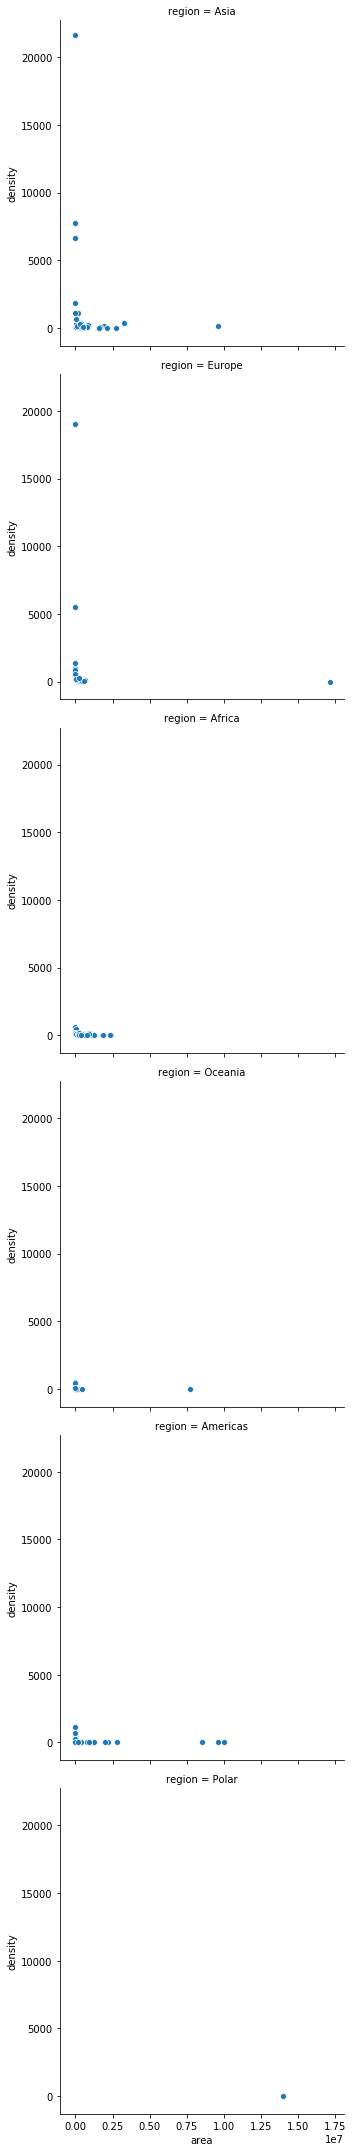

In [128]:
sns.relplot(x='area',y='density',data=df, row='region')

#### Draw a line plot showing total population in each region in ascending order

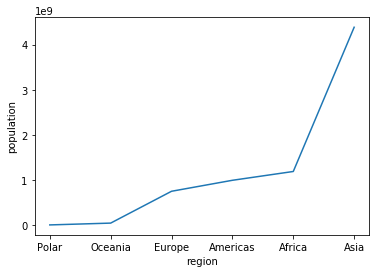

In [139]:
population = df.groupby('region',as_index=False)['population'].sum()
sns.lineplot(x='region', y='population', data=population.sort_values('population'), sort=False)

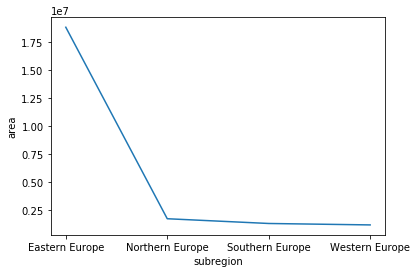

In [142]:
area = df.loc[ df.region=='Europe'].groupby('subregion',as_index=False)['area'].sum()
sns.lineplot(x='subregion', y='area',data=area)

## Regression Plots 

#### Draw regression plot for area and population in Asia

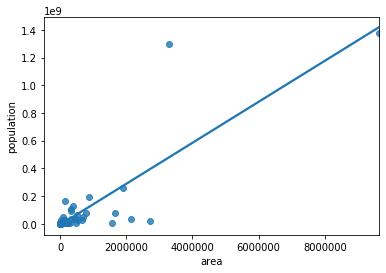

In [199]:
sns.regplot(x="area",y='population', data = df.loc[ df.region == 'Asia'], ci=False)

#### Draw regression plot for area and population for each subregion in Asia

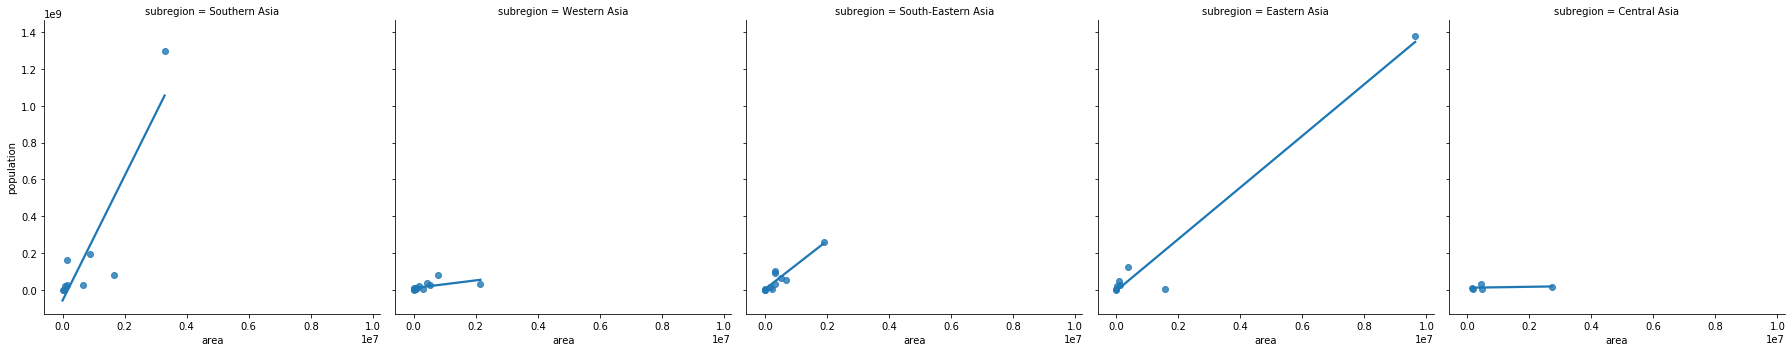

In [202]:
sns.lmplot(x="area",y='population', data = df.loc[ df.region == 'Asia'],
           col="subregion", ci=False)

## Matrix Plots

#### Draw a heatmap for density in each region

In [209]:
cm = df[['density','area','population']].corr()

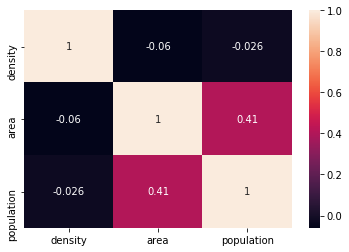

In [211]:
sns.heatmap(cm, annot=True )